In [57]:
## Import Required Libraries

import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words= set(stopwords.words("english"))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [58]:
import os 
os.getcwd()

'C:\\Users\\JAYA KUMBHKAR\\Documents\\MSc Python'

In [59]:
# Load the Dataset

df = pd.read_csv("C:\\Users\\JAYA KUMBHKAR\\Documents\\MSc Python\\vaccination_tweets.csv\\vaccination_tweets.csv")
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11015,1460932683630977025,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-17 11:27:49,"The number of Covid-19 cases today, 17 Novembe...",NaN,Twitter Web App,2,6,False
11016,1460809350792896516,Sujan,NaN,________________________ •Napricorn• •It's jus...,2013-01-28 11:48:20,4259,622,156941,False,2021-11-17 03:17:44,First dose ✅\n#PfizerBioNTech,['PfizerBioNTech'],Twitter for Android,0,4,False
11017,1460581918295031809,theSun,Petaling Jaya,Breaking news updates from the website of Mala...,2009-07-29 01:58:44,151937,465,593,False,2021-11-16 12:14:00,"The number of Covid-19 cases today, 16 Novembe...",NaN,Twitter Web App,3,5,False
11018,1460344277951782922,Aleksejs Jackovs,Ireland,#Scientificresearcher in #InformationTechnolog...,2012-08-13 13:47:03,1,38,99,False,2021-11-15 20:29:42,#PfizerBioNTech has developed new pill #Paxlov...,"['PfizerBioNTech', 'Paxlovid', 'COVID19']",Twitter Web App,1,1,False


In [60]:
# To get top 5 rows from the data
df.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [61]:
## To get more information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                11020 non-null  int64 
 1   user_name         11020 non-null  object
 2   user_location     8750 non-null   object
 3   user_description  10341 non-null  object
 4   user_created      11020 non-null  object
 5   user_followers    11020 non-null  int64 
 6   user_friends      11020 non-null  int64 
 7   user_favourites   11020 non-null  int64 
 8   user_verified     11020 non-null  bool  
 9   date              11020 non-null  object
 10  text              11020 non-null  object
 11  hashtags          8438 non-null   object
 12  source            11019 non-null  object
 13  retweets          11020 non-null  int64 
 14  favorites         11020 non-null  int64 
 15  is_retweet        11020 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 1.2+ MB


In [62]:
# To check null values in the data
df.isnull().sum()

id                     0
user_name              0
user_location       2270
user_description     679
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            2582
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [63]:
# To get the columns name
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [64]:
## now Lets create dataframe with only the text data column

text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'], axis=1)
text_df.head()


,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [65]:
## Now Analyse some of the text data in a dataFrame

print(text_df["text"].iloc[0],"\n")
print(text_df["text"].iloc[1],"\n")
print(text_df["text"].iloc[2],"\n")
print(text_df["text"].iloc[3],"\n")
print(text_df["text"].iloc[4],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 



In [66]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11020 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    11020 non-null  object
dtypes: object(1)
memory usage: 86.2+ KB


In [67]:
# Create a function

def data_processing(text):
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+"," ",text, flags= re.MULTILINE) ## remove url from data
    text = re.sub(r"\@w+|\#","",text)   ## remove hashtag and punctuations
    text = re.sub(r"[^\w\s]","",text)   ## remove stop words
    text_tokens= word_tokenize(text)
    filtered_text = [w for w in text_tokens if w is not  stop_words]
    return " ".join(filtered_text)
    

In [68]:
# now apply this preprocessing function on the data
text_df.text = text_df["text"].apply(data_processing)

In [69]:
# Remove duplicate data and text by using duplicate method

text_df = text_df.drop_duplicates("text")

In [70]:
##  Now perform Stemming on the data

stemmer = PorterStemmer()

# and define a function to perform stemming

def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [71]:
text_df["text"] = text_df["text"].apply(lambda x : stemming(x))


In [72]:
text_df.head()

,text
0,same folks said daikon paste could treat a cyt...
1,while the world has been on the wrong side of ...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
3,facts are immutable senator even when youre no...
4,explain to me again why we need a vaccine bori...


In [73]:
## now also analyse the same text as before to see effect of preprocessing function

print(text_df["text"].iloc[0],"\n")
print(text_df["text"].iloc[1],"\n")
print(text_df["text"].iloc[2],"\n")
print(text_df["text"].iloc[3],"\n")
print(text_df["text"].iloc[4],"\n")

same folks said daikon paste could treat a cytokine storm pfizerbiontech 

while the world has been on the wrong side of history this year hopefully the biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine is created to last 24 years 

facts are immutable senator even when youre not ethically sturdy enough to acknowledge them 1 you were born i 

explain to me again why we need a vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech 



In [74]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10560 entries, 0 to 11019
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    10560 non-null  object
dtypes: object(1)
memory usage: 165.0+ KB


In [75]:
# lets use textblob to calculate the polarity of the sentences
# so lets define a function to calculate the polarity

def polarity(text):
    return TextBlob(text).sentiment.polarity

In [76]:
## now lets calculate the polarity of text and add it to the dataframe

text_df["polarity"] = text_df["text"].apply(polarity)

In [77]:
text_df.head(10)

,text,polarity
0,same folks said daikon paste could treat a cyt...,0.000
1,while the world has been on the wrong side of ...,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,facts are immutable senator even when youre no...,-0.050
4,explain to me again why we need a vaccine bori...,0.000
5,does anyone have any useful adviceguidance for...,0.400
6,it is a bit sad to claim the fame for success ...,-0.100
7,there have not been many bright days in 2020 b...,0.675
8,covid vaccine you getting it covidvaccine covi...,0.000
9,covidvaccine states will start getting covid19...,0.000


In [78]:
##  Now add a sentiment column to the data frame to do that lets define a function to calculate sentiment

def sentiment(label):
    if label<0:
        return "Negetive"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [79]:
## apply this function  on the dataframe

text_df["sentiment"]= text_df["polarity"].apply(sentiment)

In [80]:
text_df.head()

,text,polarity,sentiment
0,same folks said daikon paste could treat a cyt...,0.00,Neutral
1,while the world has been on the wrong side of ...,-0.50,Negetive
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.00,Neutral
3,facts are immutable senator even when youre no...,-0.05,Negetive
4,explain to me again why we need a vaccine bori...,0.00,Neutral


<AxesSubplot:xlabel='sentiment', ylabel='count'>

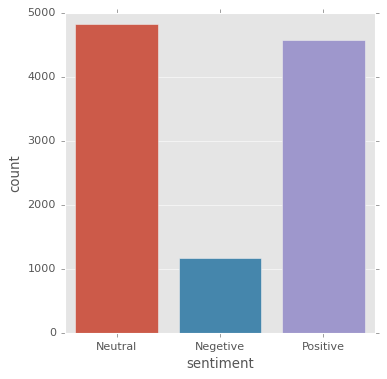

In [81]:
## now visualize a distribution of data using countplot

fig = plt.figure(figsize=(5,5))
sns.countplot(x= "sentiment",data= text_df)


Text(0.5, 1.0, 'Distribution of Sentiments')

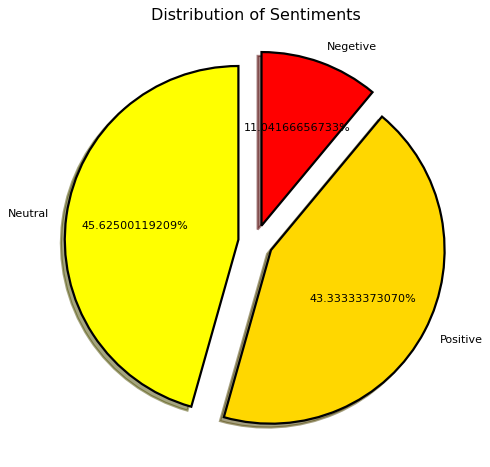

In [82]:
## we also visualize the data by using pie chart

fig = plt.figure(figsize=(7,7))
colors = ("yellow", "gold","red")
wp = {"linewidth":2 ,"edgecolor":"black"}
tags = text_df["sentiment"].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind="pie", autopct="%1.11f%%" , shadow =True , colors =colors,
         startangle =90, wedgeprops =wp ,explode =explode ,label="")
plt.title("Distribution of Sentiments")

In [83]:
## Now lets see top 5 tweets for each sentiment starting with positive sentiment

pos_tweets = text_df[text_df.sentiment=="Positive"]
pos_tweets = pos_tweets.sort_values(["polarity"], ascending =False)
pos_tweets.head()

,text,polarity,sentiment
2906,i got an appointment for my covid vaccine on m...,1.0,Positive
3276,thank you cuh_nhs cpft_nhs cpft_research steph...,1.0,Positive
8870,the vaccinated club is the best club to be in ...,1.0,Positive
6792,this is the best news yet pfizercovidvaccine p...,1.0,Positive
6732,primera dosis pfizerbiontech covid_19 yomevacu...,1.0,Positive


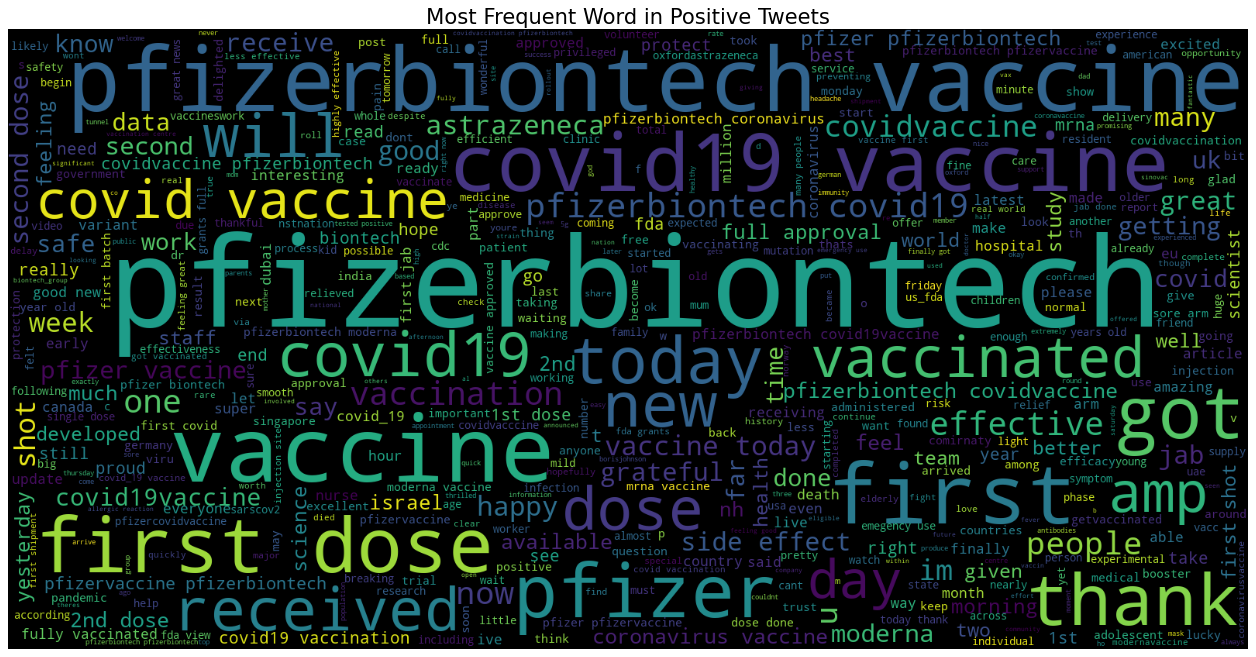

In [84]:
### Now use word cloud to visualize the positive sentiment

text=" ".join([word for word in pos_tweets["text"]])
plt.figure(figsize=(20,15),facecolor ="None")
wordcloud = WordCloud(max_words=500 ,width =1600, height =800).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Word in Positive Tweets", fontsize =19)
plt.show()

In [85]:
## Now see top 5 tweets in negetive sentiment 

neg_tweets = text_df[text_df.sentiment=="Negetive"]
neg_tweets = pos_tweets.sort_values(["polarity"], ascending =False)
neg_tweets.head()

,text,polarity,sentiment
2906,i got an appointment for my covid vaccine on m...,1.0,Positive
9216,this is despite israel having the pfizerbionte...,1.0,Positive
9209,at the moment pfizerbiontech is one of the bes...,1.0,Positive
4417,best feeling when i got my covidvaccine lets k...,1.0,Positive
7470,wonderful news pfizerbiontech covidvaccine,1.0,Positive


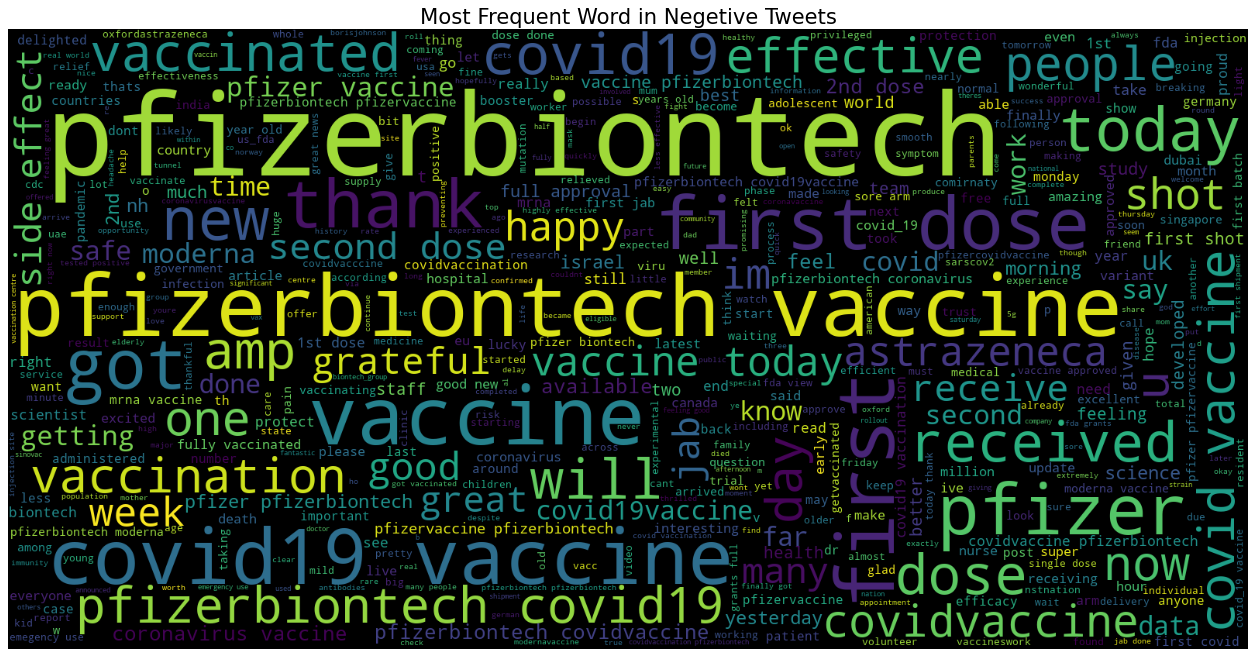

In [86]:
## now visualize the negetive tweets using word cloud

text=" ".join([word for word in neg_tweets["text"]])
plt.figure(figsize=(20,15),facecolor ="None")
wordcloud = WordCloud(max_words=500 ,width =1600, height =800).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Word in Negetive Tweets", fontsize =19)
plt.show()

In [87]:
## now see top 5 tweets in neutral sentiment

neutral_tweets = text_df[text_df.sentiment=="Neutral"]
neutral_tweets = pos_tweets.sort_values(["polarity"], ascending =False)
neutral_tweets.head()

,text,polarity,sentiment
2906,i got an appointment for my covid vaccine on m...,1.0,Positive
9216,this is despite israel having the pfizerbionte...,1.0,Positive
9209,at the moment pfizerbiontech is one of the bes...,1.0,Positive
4417,best feeling when i got my covidvaccine lets k...,1.0,Positive
7470,wonderful news pfizerbiontech covidvaccine,1.0,Positive


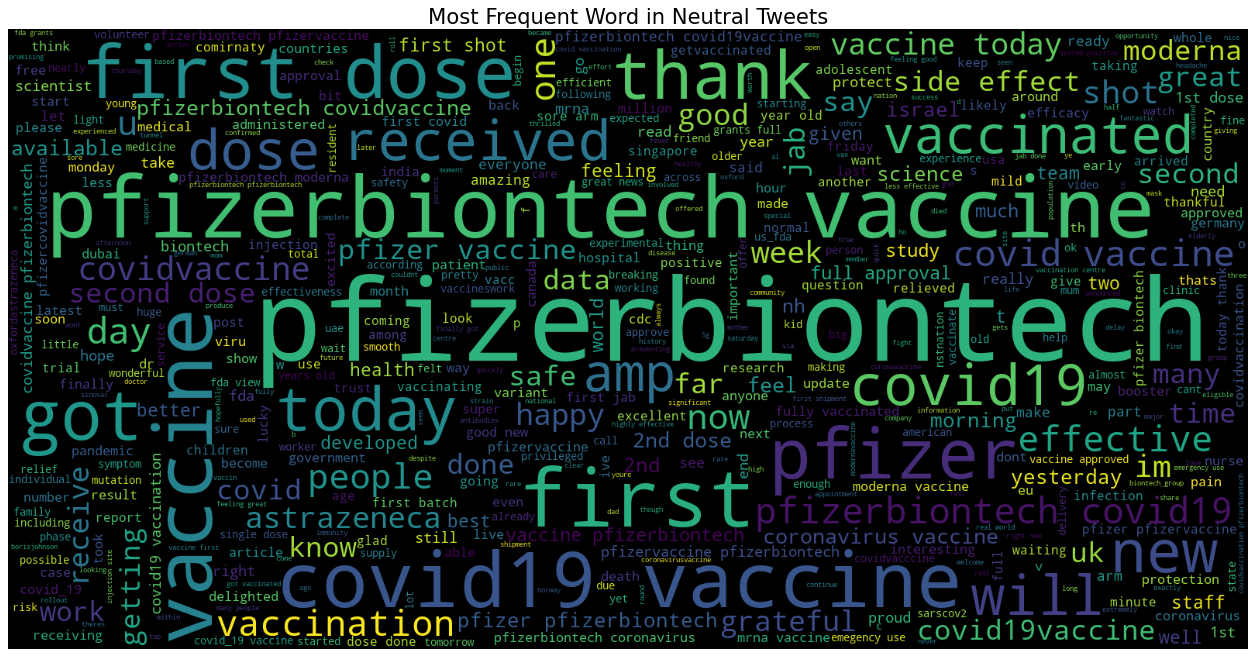

In [88]:
## visualize neitral tweets using word cloud

text=" ".join([word for word in neutral_tweets["text"]])
plt.figure(figsize=(20,15),facecolor ="None")
wordcloud = WordCloud(max_words=500 ,width =1600, height =800).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Word in Neutral Tweets", fontsize =19)
plt.show()

In [89]:
## Now Vectorize the data using countvectorizer and create a bigram model

vect = CountVectorizer(ngram_range=(1,2)).fit(text_df["text"])

In [90]:
## now lets get the number of feature and print first 20 feature 
## then in the output we can see 20 feature from bigram  language model

feature_names = vect.get_feature_names()
print("Number of Features: {}\n". format(len(feature_names)))
print("First 20 Features: \n {}".format(feature_names[:20]))

Number of Features: 90638

First 20 Features: 
 ['000', '000 doses', '000 of', '000 people', '000 vaccines', '0000001', '0000001 covid19', '0011', '0011 of', '004', '004 covid', '004 of', '01', '01 after', '01 june', '01 november', '01aug2021', '01aug2021 doublevaxxed', '02', '02 of']


In [91]:
## now seperate the data into X and Y 

X = text_df["text"]
Y = text_df["sentiment"]
X = vect.transform(X)

In [92]:
## Now put the data into training and testing data

x_train , x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2 ,random_state=42)

In [93]:
## now to get the size and shape of training and testing data

print("Size of x_train:", x_train.shape)
print("Size of x_test:" , x_test.shape)
print("Size of y_train:", y_train.shape)
print("Size of y_test:" , y_test.shape)

Size of x_train: (8448, 90638)
Size of x_test: (2112, 90638)
Size of y_train: (8448,)
Size of y_test: (2112,)


In [94]:
## Now first train the data on logistic regression model

logreg= LogisticRegression()
logreg.fit(x_train,y_train)
logreg_pred =logreg.predict(x_test)
logreg_acc= accuracy_score(logreg_pred ,y_test)
print("Test Accuracy: {:.2f}%".format(logreg_acc*100))

Test Accuracy: 83.90%


In [95]:
## Print the confusion matrix and classification report

print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[ 65 112  44]
 [  8 930  27]
 [ 17 132 777]]


              precision    recall  f1-score   support

    Negetive       0.72      0.29      0.42       221
     Neutral       0.79      0.96      0.87       965
    Positive       0.92      0.84      0.88       926

    accuracy                           0.84      2112
   macro avg       0.81      0.70      0.72      2112
weighted avg       0.84      0.84      0.83      2112



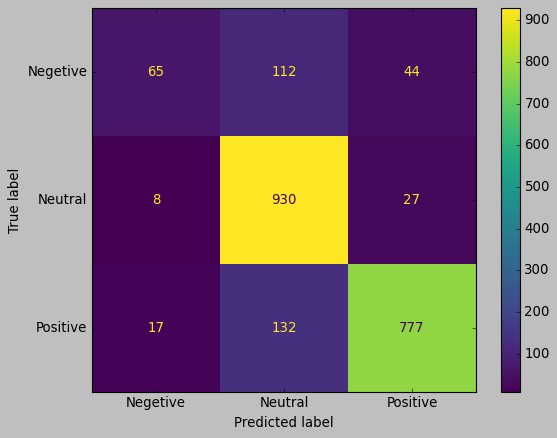

In [96]:
## now here is also another way to calculate the confusion matrix that is by using confusion matrix display

style.use("classic")
cm = confusion_matrix(y_test, logreg_pred, labels =logreg.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix =cm ,display_labels =logreg.classes_)
disp.plot()

In [97]:
## Now we perform hyper parameter tuning  use GridSearchCV

from sklearn.model_selection import GridSearchCV

In [98]:
## we perform hyper parameter tuning on the c parameter

param_grid={"C":[0.001,0.01,0.1,1,10]}
grid = GridSearchCV(LogisticRegression(),param_grid)
grid.fit(x_train ,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [99]:
# print the best parameters

print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 10}


In [100]:
## predict the values for given x_test

y_pred = grid.predict(x_test)

In [101]:
## now calculate the model accuracy

logreg_acc = accuracy_score(y_pred, y_test)
print("Test Accuracy: {:.2f}%)".format(logreg_acc*100))

Test Accuracy: 85.09%)


In [102]:
## print the confusion matrix and classification report

print(confusion_matrix(y_test,logreg_pred))
print("\n")
print(classification_report(y_test,logreg_pred))

[[ 65 112  44]
 [  8 930  27]
 [ 17 132 777]]


              precision    recall  f1-score   support

    Negetive       0.72      0.29      0.42       221
     Neutral       0.79      0.96      0.87       965
    Positive       0.92      0.84      0.88       926

    accuracy                           0.84      2112
   macro avg       0.81      0.70      0.72      2112
weighted avg       0.84      0.84      0.83      2112



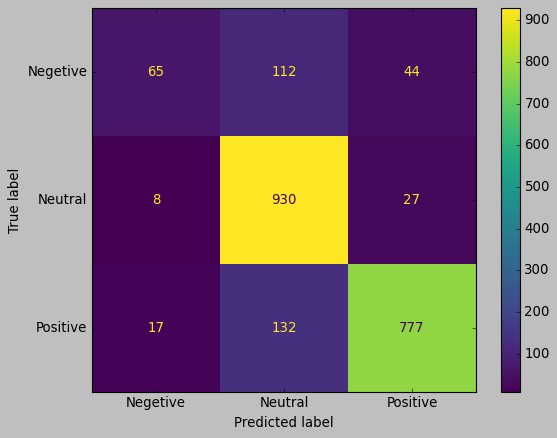

In [103]:
## confusion matrix

style.use("classic")
cm = confusion_matrix(y_test, logreg_pred, labels =logreg.classes_)
disp= ConfusionMatrixDisplay(confusion_matrix =cm ,display_labels =logreg.classes_)
disp.plot()

In [104]:
##  now lets run the model on one more algorithm support vector machine
## import support vectore classifier

from sklearn.svm import LinearSVC

In [105]:
## load the classifier and fit the data on this model

SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)

LinearSVC()

In [106]:
## now predict the value for the given test data and calculate the accuracy

svc_pred = SVCmodel.predict(x_test)
svc_acc = accuracy_score(svc_pred , y_test)
print("Test Accuracy:{:.2f}%" .format(svc_acc*100))

Test Accuracy:86.22%


In [107]:
## now print confusion matrix and classification report

print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[ 96  88  37]
 [ 11 930  24]
 [ 21 110 795]]


              precision    recall  f1-score   support

    Negetive       0.75      0.43      0.55       221
     Neutral       0.82      0.96      0.89       965
    Positive       0.93      0.86      0.89       926

    accuracy                           0.86      2112
   macro avg       0.83      0.75      0.78      2112
weighted avg       0.86      0.86      0.85      2112



In [108]:
## now perform hyper parameter tuning for svm model . 
## now define a parameter for svm model 

grid ={
    "C":[0.01,0.1,1,10],
    "kernel":["linear","poly","rbf","sigmoid"],
    "degree":[1,3,5,7],
    "gamma": [0.01,1]
}
grid = GridSearchCV(SVCmodel , param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=LinearSVC(), param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [109]:
## print best parameter 

print("Best Parameter:", grid.best_params_)

Best Parameter: {'C': 10}


In [110]:
## predict the value for the given x_test data

y_pred = grid.predict(x_test)

In [111]:
## now calculate the model accuracy if there is any change

logreg_acc = accuracy_score(y_pred , y_test)
print("Test Accuracy: {:.2f}%" . format(logreg_acc*100))

Test Accuracy: 86.22%


In [112]:
## print confusion matrix and classification report 

print(confusion_matrix(y_test,y_pred))
print("\n")
print(classification_report(y_test,y_pred))

[[ 97  88  36]
 [ 12 930  23]
 [ 23 109 794]]


              precision    recall  f1-score   support

    Negetive       0.73      0.44      0.55       221
     Neutral       0.83      0.96      0.89       965
    Positive       0.93      0.86      0.89       926

    accuracy                           0.86      2112
   macro avg       0.83      0.75      0.78      2112
weighted avg       0.86      0.86      0.86      2112

